# Prepare Datasets and Create the Project Structure

Notebook to preprocess the dataset and create a proper folder structure to store the data. This notebook must be run before running the `Data_Augmentation_Using_Generative_Adversarial_Networks.ipynb` notebook that should be available in the same folder.

### Prerequisites

Ensure that the Cityscapes dataset is downloaded and placed in the current working directory. The dataset can be downloaded from [here](https://www.cityscapes-dataset.com/). You need to register to access the dataset. The following datasets are required for data augmentation:
1. [gtFine_trainvaltest.zip](https://www.cityscapes-dataset.com/file-handling/?packageID=1) (241MB): Fine annotations for training and validation datasets (3475 annotated images) and dummy annotations (ignore regions) for the test set (1525 images).
2. [leftImg8bit_trainvaltest.zip](https://www.cityscapes-dataset.com/file-handling/?packageID=3) (11GB): Left 8-bit images - training, validation, and test datasets (5000 images).

### Check Python version

In [1]:
import platform
assert (platform.python_version_tuple()[:2] >= ('3','7')), "The notebooks are tested on Python 3.7 and higher. Please updated your Python to evaluate the code"

### Check Notebook server has access to all required resources

In [2]:
from pathlib import Path

dataset_folder = Path("dataset")
dataset_folder = Path.joinpath(Path.cwd(), dataset_folder)

if not dataset_folder.exists():
    raise FileNotFoundError("Add `{}` folder in the current directory (`{}`)".format(dataset_folder.name, Path.cwd()))

In [3]:
expected_zipped_datasets = ["gtFine_trainvaltest.zip", "leftImg8bit_trainvaltest.zip"]
expected_zipped_datasets_path = list()

for zipped_dataset in expected_zipped_datasets:
    zipped_dataset = Path.joinpath(dataset_folder, zipped_dataset)
    expected_zipped_datasets_path.append(zipped_dataset)
    if not zipped_dataset.exists():
        raise FileNotFoundError("Download and place `{}` in the current directory (`{}`)".format(zipped_dataset.name, Path.cwd()))

### Unzip Datasets

In [4]:
import zipfile as zf

unzipped_datasets_name = [str(dataset_name).replace(".zip", "") for dataset_name in expected_zipped_datasets]
unzipped_datasets_path = [Path.joinpath(dataset_folder, dataset_name) for dataset_name in unzipped_datasets_name]

for dataset_input_path, dataset_output_path in zip(expected_zipped_datasets_path, unzipped_datasets_path):
    with zf.ZipFile(dataset_input_path, 'r') as zip_ref:
        zip_ref.extractall(dataset_output_path)
        
print("Unzipped Datasets Successfully!")

### Evaluate Datasets

In [24]:
import os
import glob

# Evaluate Overall Dataset

segmentation_map_expr_overall = str(unzipped_datasets_path[0]) + "\\**\\*_color.png"
segmentation_map_paths_overall = glob.glob(segmentation_map_expr_overall, recursive=True)
segmentation_map_paths_overall = sorted(segmentation_map_paths_overall)

photo_expr_overall = str(unzipped_datasets_path[1]) + "\\**\\*_leftImg8bit.png"
photo_paths_overall = glob.glob(photo_expr_overall, recursive=True)
photo_overall = sorted(photo_paths_overall)

print("\nOverall Dataset: \nFound {} images of segmentation maps.\nFound {} photos.".format(len(segmentation_map_paths_overall), len(segmentation_map_paths_overall)))

assert (len(segmentation_map_paths_overall) == len(photo_overall)), ("Dataset Incorrect! Number of semantic segmentation maps do not match the number of photos!")

# Evaluate Training Dataset

segmentation_map_expr_train = str(unzipped_datasets_path[0]) + "\\**\\train\\**\\*_color.png"
segmentation_map_paths_train = glob.glob(segmentation_map_expr_train, recursive=True)
segmentation_map_paths_train = sorted(segmentation_map_paths_train)

photo_expr_train = str(unzipped_datasets_path[1]) + "\\**\\train\\**\\*_leftImg8bit.png"
photo_paths_train = glob.glob(photo_expr_train, recursive=True)
photo_train = sorted(photo_paths_train)

print("\nTraining Dataset: \nFound {} images of segmentation maps.\nFound {} photos.".format(len(segmentation_map_paths_train), len(photo_train)))

assert (len(segmentation_map_paths_train) == len(photo_train)), ("Dataset Incorrect! Number of semantic segmentation maps do not match the number of photos!")

# Evaluate Validation Dataset

segmentation_map_expr_val = str(unzipped_datasets_path[0]) + "\\**\\val\\**\\*_color.png"
segmentation_map_paths_val = glob.glob(segmentation_map_expr_val, recursive=True)
segmentation_map_paths_val = sorted(segmentation_map_paths_val)

photo_expr_val = str(unzipped_datasets_path[1]) + "\\**\\val\\**\\*_leftImg8bit.png"
photo_paths_val = glob.glob(photo_expr_val, recursive=True)
photo_val = sorted(photo_paths_val)

print("\nValidation Dataset: \nFound {} images of segmentation maps.\nFound {} photos.".format(len(segmentation_map_paths_val), len(photo_val)))

assert (len(segmentation_map_paths_val) == len(photo_val)), ("Dataset Incorrect! Number of semantic segmentation maps do not match the number of photos!")

# Evaluate Test Dataset

segmentation_map_expr_test = str(unzipped_datasets_path[0]) + "\\**\\test\\**\\*_color.png"
segmentation_map_paths_test = glob.glob(segmentation_map_expr_test, recursive=True)
segmentation_map_paths_test = sorted(segmentation_map_paths_test)

photo_expr_test = str(unzipped_datasets_path[1]) + "\\**\\test\\**\\*_leftImg8bit.png"
photo_paths_test = glob.glob(photo_expr_test, recursive=True)
photo_test = sorted(photo_paths_test)

print("\nTest Dataset: \nFound {} images of segmentation maps.\nFound {} photos.".format(len(segmentation_map_paths_test), len(photo_test)))

assert (len(segmentation_map_paths_test) == len(photo_test)), ("Dataset Incorrect! Number of semantic segmentation maps do not match the number of photos!")


Overall Dataset: 
Found 5000 images of segmentation maps.
Found 5000 photos.

Training Dataset: 
Found 2975 images of segmentation maps.
Found 2975 photos.
500
500

Validation Dataset: 
Found 500 images of segmentation maps.
Found 500 photos.

Test Dataset: 
Found 1525 images of segmentation maps.
Found 1525 photos.


### Display Images from Dataset

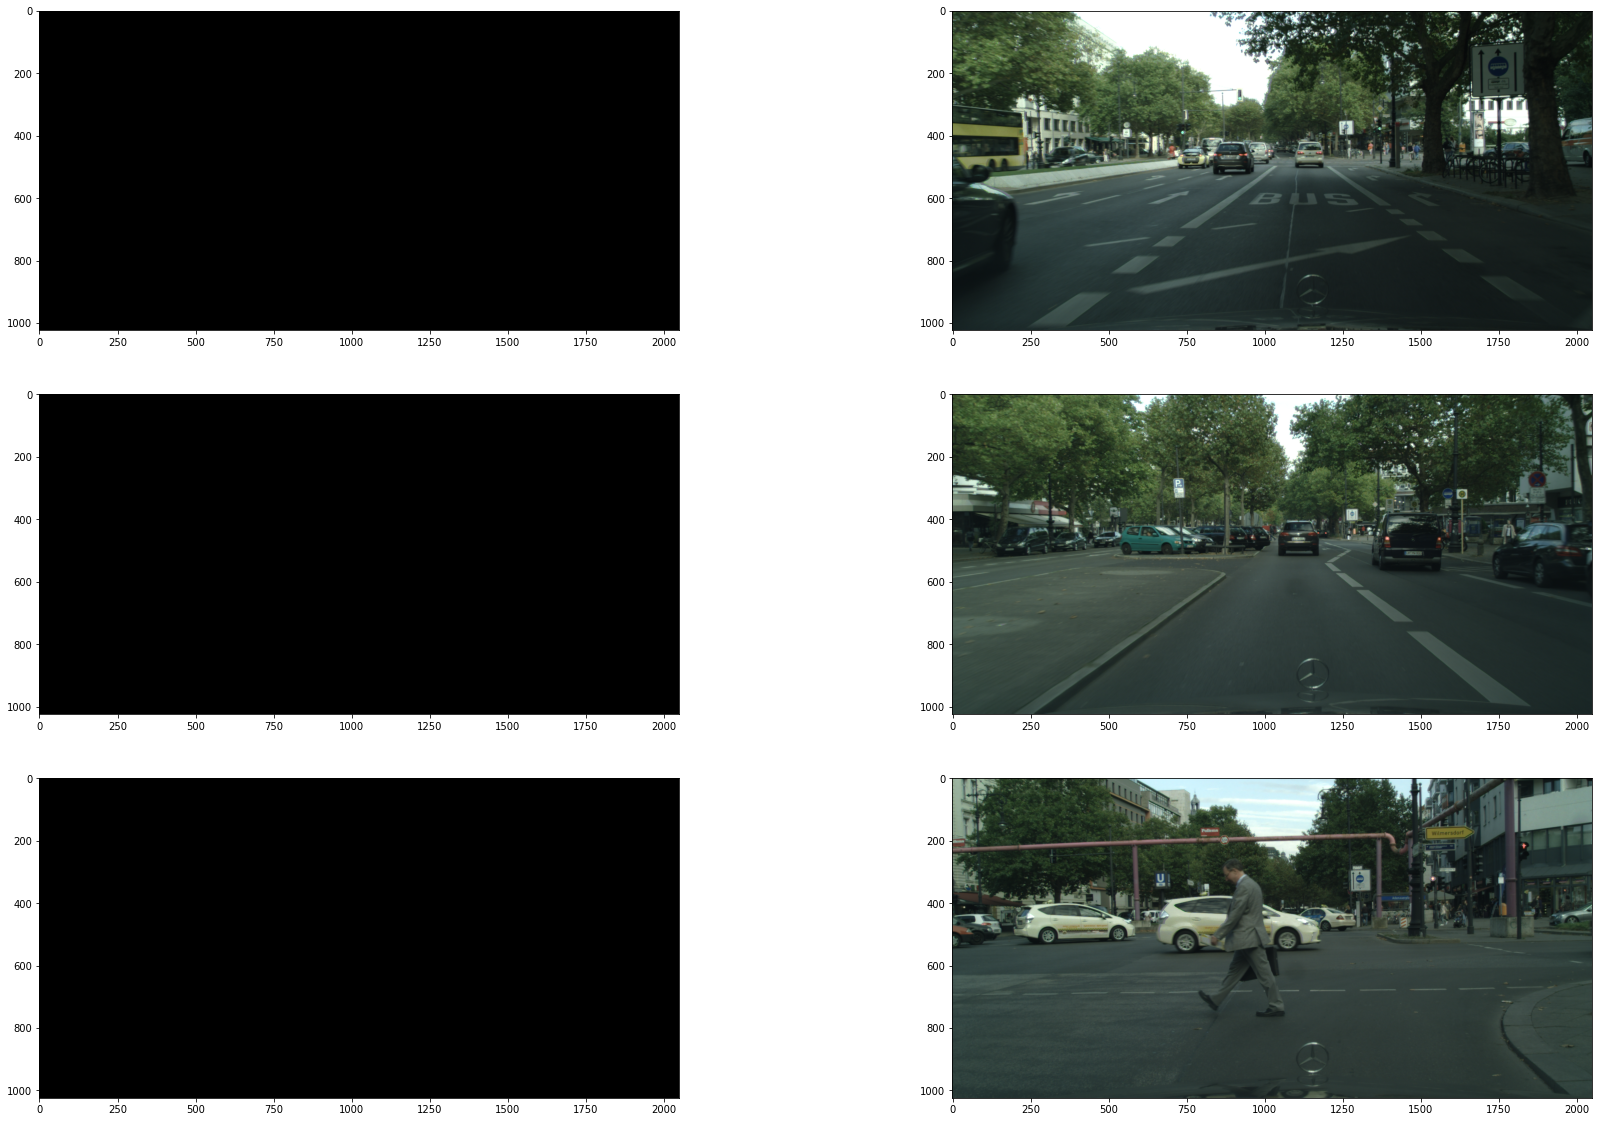

In [33]:
import matplotlib.image as img
import matplotlib.pyplot as plt
%matplotlib inline

list_of_segmentation_maps = segmentation_map_paths_overall[:3]
list_of_photos = photo_overall[:3]

f, axarr = plt.subplots(len(list_of_segmentation_maps),2, figsize=(30,20))

for iterator, (segmentation_map_path, photo_path) in enumerate(zip(list_of_segmentation_maps, list_of_photos)):
    segmentation_map_data = img.imread(segmentation_map_path)
    photo_data = img.imread(photo_path)
    axarr[iterator, 0].imshow(segmentation_map_data)
    axarr[iterator, 1].imshow(photo_data)

### Create Project Structure

### Process Cityscape Dataset

### Display Processed Dataset